<h1 align="center"> Python Essentials: Data Visualization.</h1>

    Maxwell Nielsen
    Section 001
    12/6/2021

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats

In [2]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

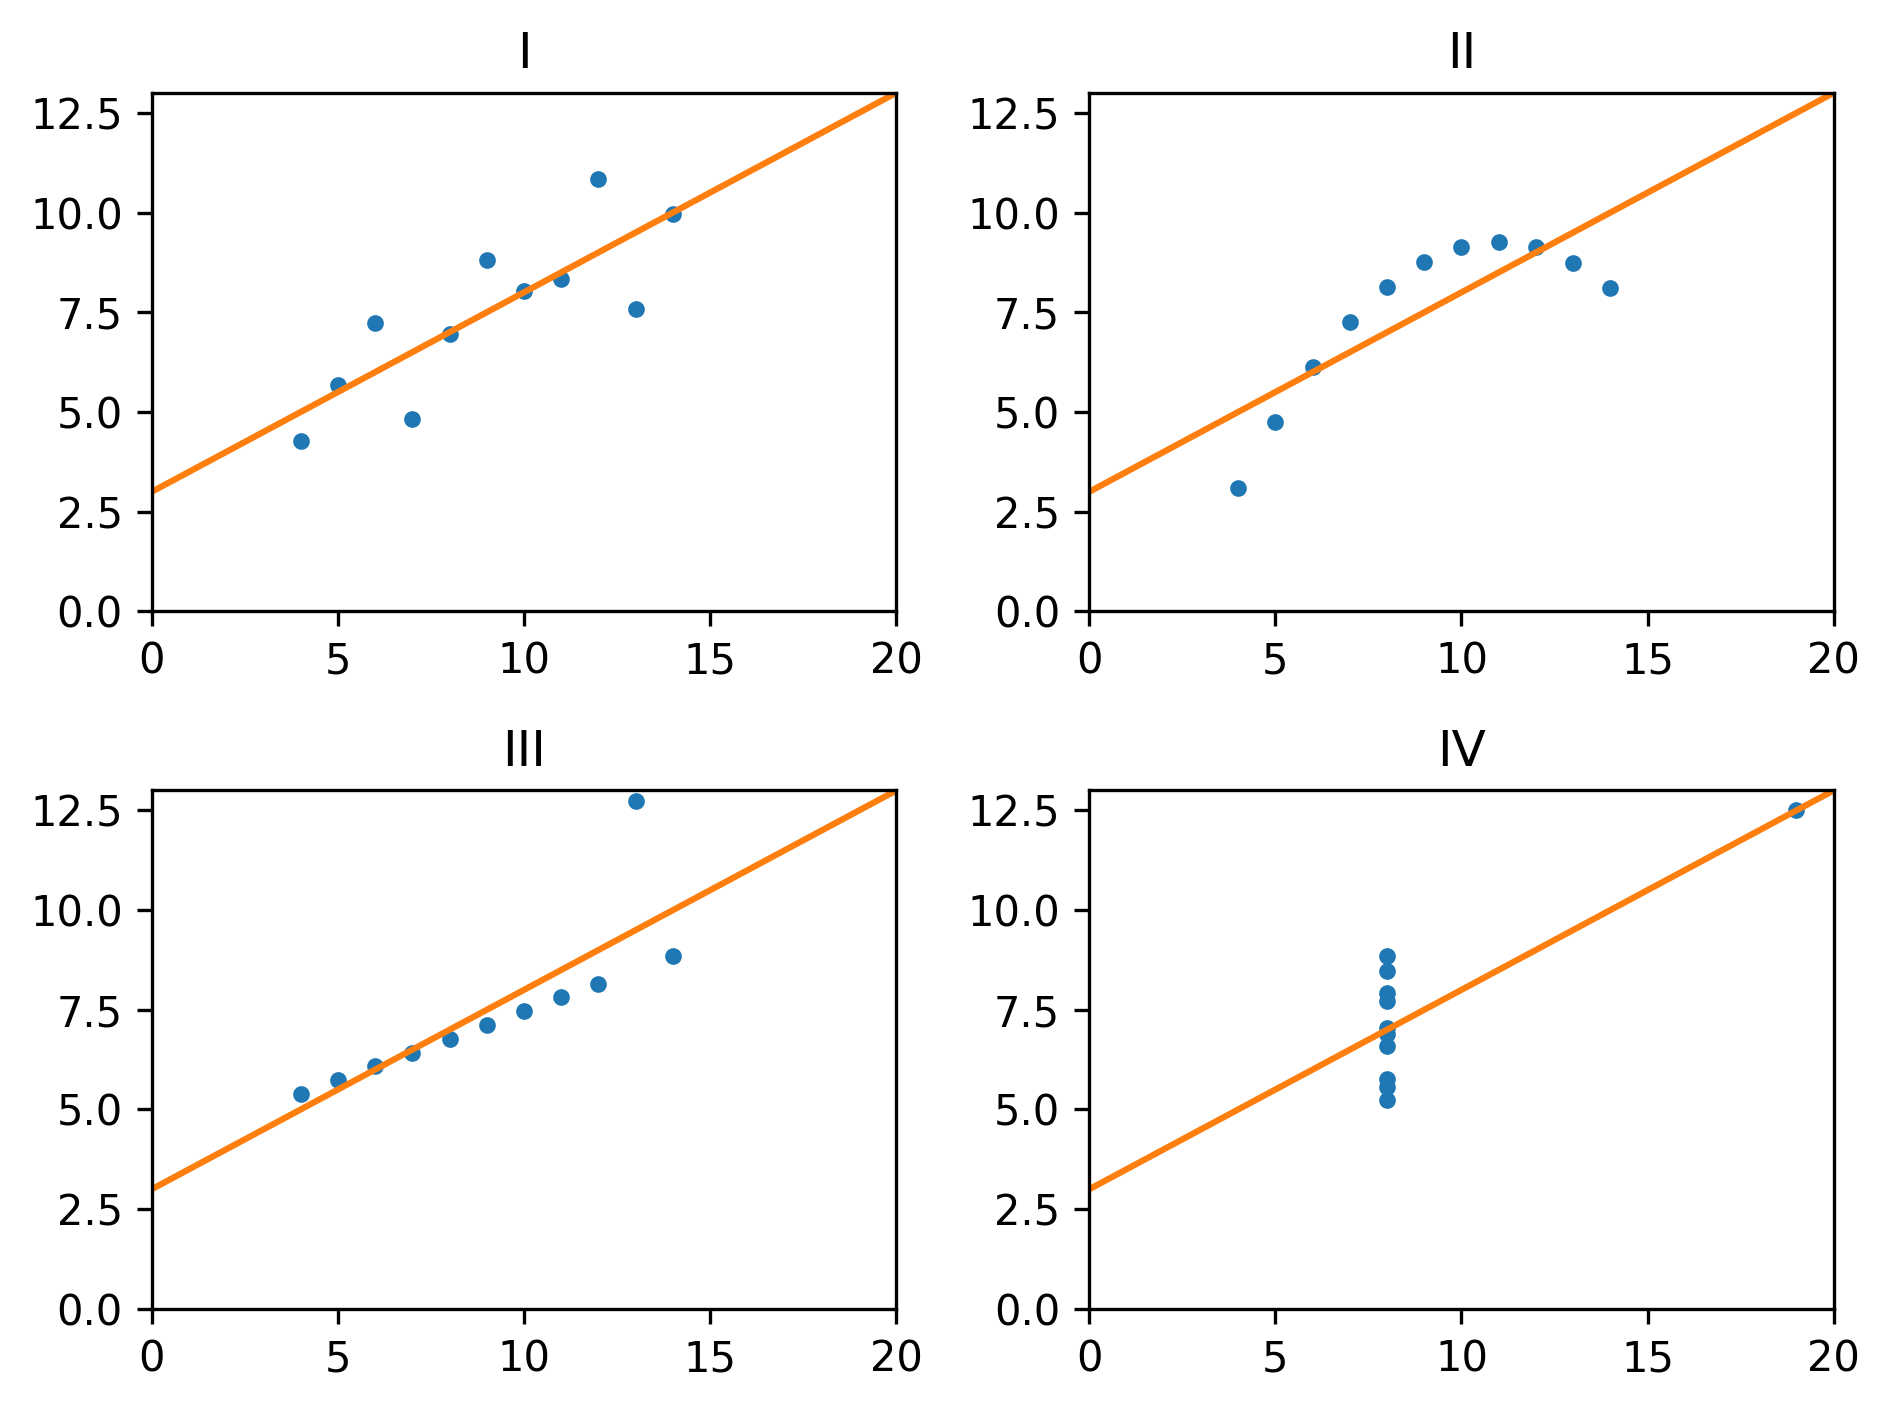

Quartet I:
Mean of x:9.0
Mean of y:7.500909090909093
Variance of x:10.0
Variance of y:3.7520628099173554
Least squares slope:0.5000909090909091
Least squares intercept:3.0000909090909103
Correlation coefficient:0.8164205163448399

Quartet II:
Mean of x:9.0
Mean of y:7.50090909090909
Variance of x:10.0
Variance of y:3.752390082644628
Least squares slope:0.5000000000000001
Least squares intercept:3.000909090909089
Correlation coefficient:0.816236506000243

Quartet III:
Mean of x:9.0
Mean of y:7.5
Variance of x:10.0
Variance of y:3.747836363636364
Least squares slope:0.4997272727272729
Least squares intercept:3.002454545454544
Correlation coefficient:0.8162867394895984

Quartet IV:
Mean of x:9.0
Mean of y:7.500909090909091
Variance of x:10.0
Variance of y:3.7484082644628103
Least squares slope:0.4999090909090909
Least squares intercept:3.0017272727272726
Correlation coefficient:0.8165214368885028

Quartert 1 has the same x mean and variance as the other quartets, and almost the same
    y

In [3]:
A = np.load("anscombe.npy")

x1 = A[:, 0]
y1 = A[:, 1]    #get x and y points from each quartet 

x2 = A[:, 2]
y2 = A[:, 3]

x3 = A[:, 4]
y3 = A[:, 5]

x4 = A[:, 6]
y4 = A[:, 7]

domain = np.linspace(0,20,100)   #create domain over which we will graph our regressions

plt.subplot(221)
plt.title("I")
plt.plot(x1,y1, '.')       #plot scatter plot of data for each quartet
plt.xlim(0, 20)
plt.ylim(0, 13)
s1, i1, c1 = scipy.stats.linregress(x1, y1)[0:3]   #find slope, intercept, and correlation coefficient for each
plt.plot(domain, (s1 * domain) + i1)

plt.subplot(222)
plt.title("II")
plt.plot(x2,y2, '.')
plt.xlim(0, 20)
plt.ylim(0, 13)
s2, i2, c2 = scipy.stats.linregress(x2, y2)[0:3]
plt.plot(domain, (s2 * domain) + i2)

plt.subplot(223)
plt.title("III")
plt.plot(x3,y3, '.')
plt.xlim(0, 20)
plt.ylim(0, 13)
s3, i3, c3 = scipy.stats.linregress(x3, y3)[0:3]
plt.plot(domain, (s3 * domain) + i3)

plt.subplot(224)
plt.title("IV")
plt.plot(x4,y4, '.')
plt.xlim(0, 20)
plt.ylim(0, 13)
s4, i4, c4 = scipy.stats.linregress(x4, y4)[0:3]
plt.plot(domain, (s4 * domain) + i4)

plt.tight_layout()
plt.show()

quarters = ["I", "II", "III", "IV"]    #report all of the statistics from each quartet
for i in range(4):
    print("Quartet " + quarters[i] + ":", sep='')
    print("Mean of x:" + str(np.mean(A[:,2*i])))
    print("Mean of y:" + str(np.mean(A[:,2*i + 1])))
    print("Variance of x:" + str(np.var(A[:, 2*i])))
    print("Variance of y:" + str(np.var(A[:, 2*i + 1])))
    print("Least squares slope:" + str(scipy.stats.linregress(A[:, 2*i:2*(i+1)])[0]))
    print("Least squares intercept:" + str(scipy.stats.linregress(A[:, 2*i:2*(i+1)])[1]))
    print("Correlation coefficient:" + str(scipy.stats.linregress(A[:, 2*i:2*(i+1)])[2]) +"\n")

print("""Quartert 1 has the same x mean and variance as the other quartets, and almost the same
    y mean and variance, least squares slope, least squares intercept, and correlation coefficient as the other
    quartets. The only thing thats really different is the distribution of the points in the scatterplot
    which is more of a loosely correlated group of points.""")
print('\n')

print("""Quartert 2 has the same x mean and variance as the other quartets, and almost the same
    y mean and variance, least squares slope, least squares intercept, and correlation coefficient as the other
    quartets. The only thing thats really different is the distribution of the points in the scatterplot
    which is more of a smooth curve.""")
print('\n')

print("""Quartert 3 has the same x mean and variance as the other quartets, and almost the same
    y mean and variance, least squares slope, least squares intercept, and correlation coefficient as the other
    quartets. The only thing thats really different is the distribution of the points in the scatterplot
    which is more of a linearly correlated group of points with one stray point""")
print('\n')

print("""Quartert 4 has the same x mean and variance as the other quartets, and almost the same
    y mean and variance, least squares slope, least squares intercept, and correlation coefficient as the other
    quartets. The only thing thats really different is the distribution of the points in the scatterplot
    which is more of a set of points from a vertical line.""")

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

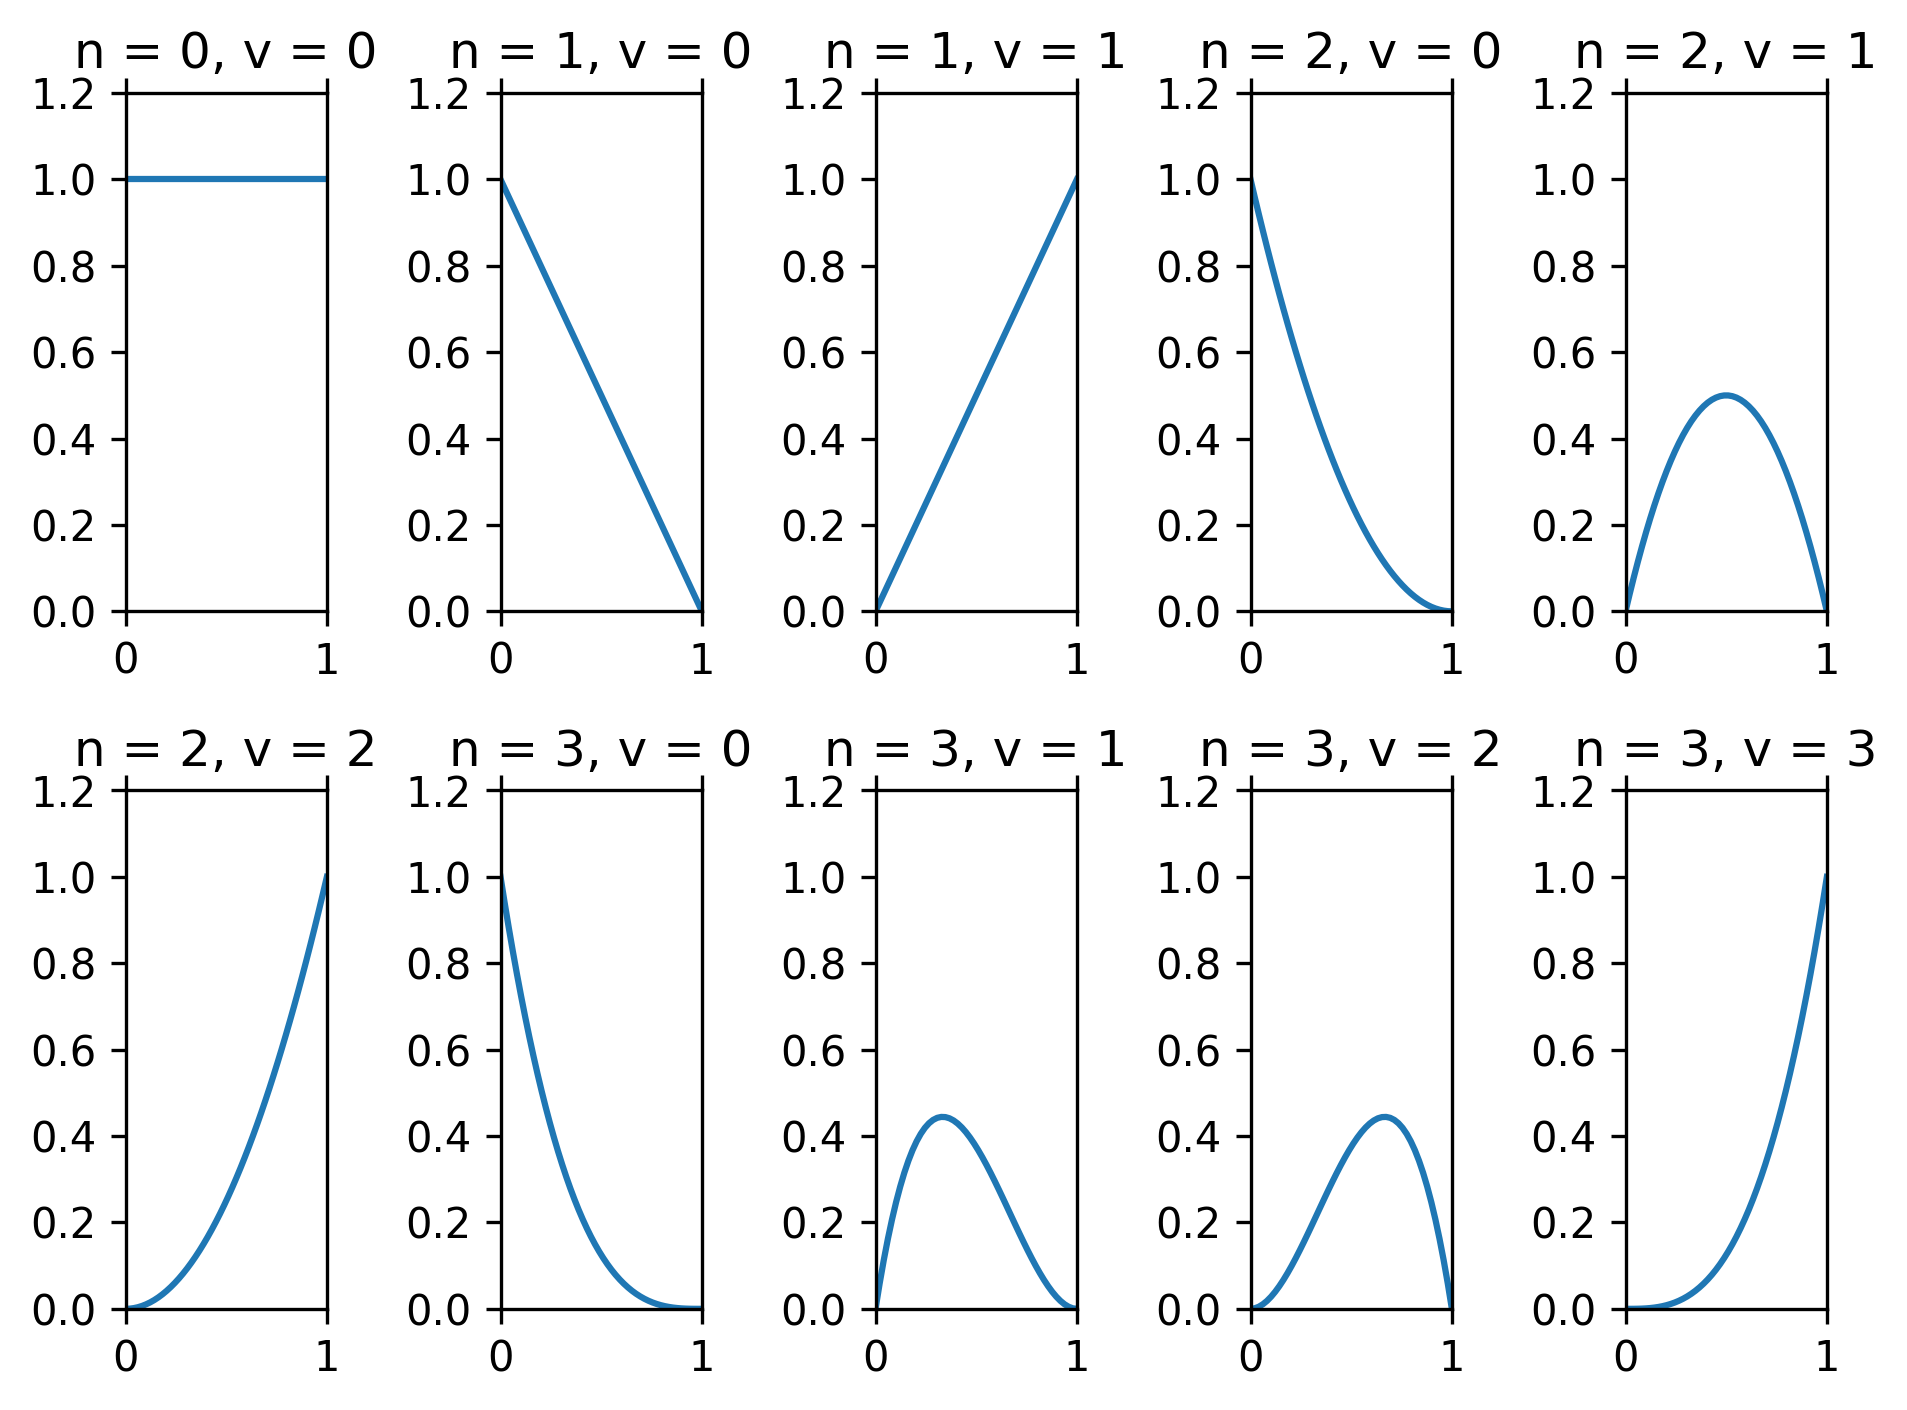

In [4]:
domain = np.linspace(0,1,50)
q = 1
for n in range(0,4):  #calculate first 10 bernstein basis polynomials
    for v in range(0, n+1):
        bern = scipy.special.comb(n,v) * domain**v * (1-domain)**(n-v)  #calculate binomial coefficient
        plt.subplot(2, 5, q)
        plt.plot(domain, bern)    #plot the bernstein polynomial over our domain
        plt.axis([0, 1, 0, 1.2])
        plt.title("n = " + str(n) + ", v = " + str(v))
        plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off')  #simplify graphs
        
        q+=1     #counter variable for subplot format
        
plt.tight_layout()
plt.show()
        



### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

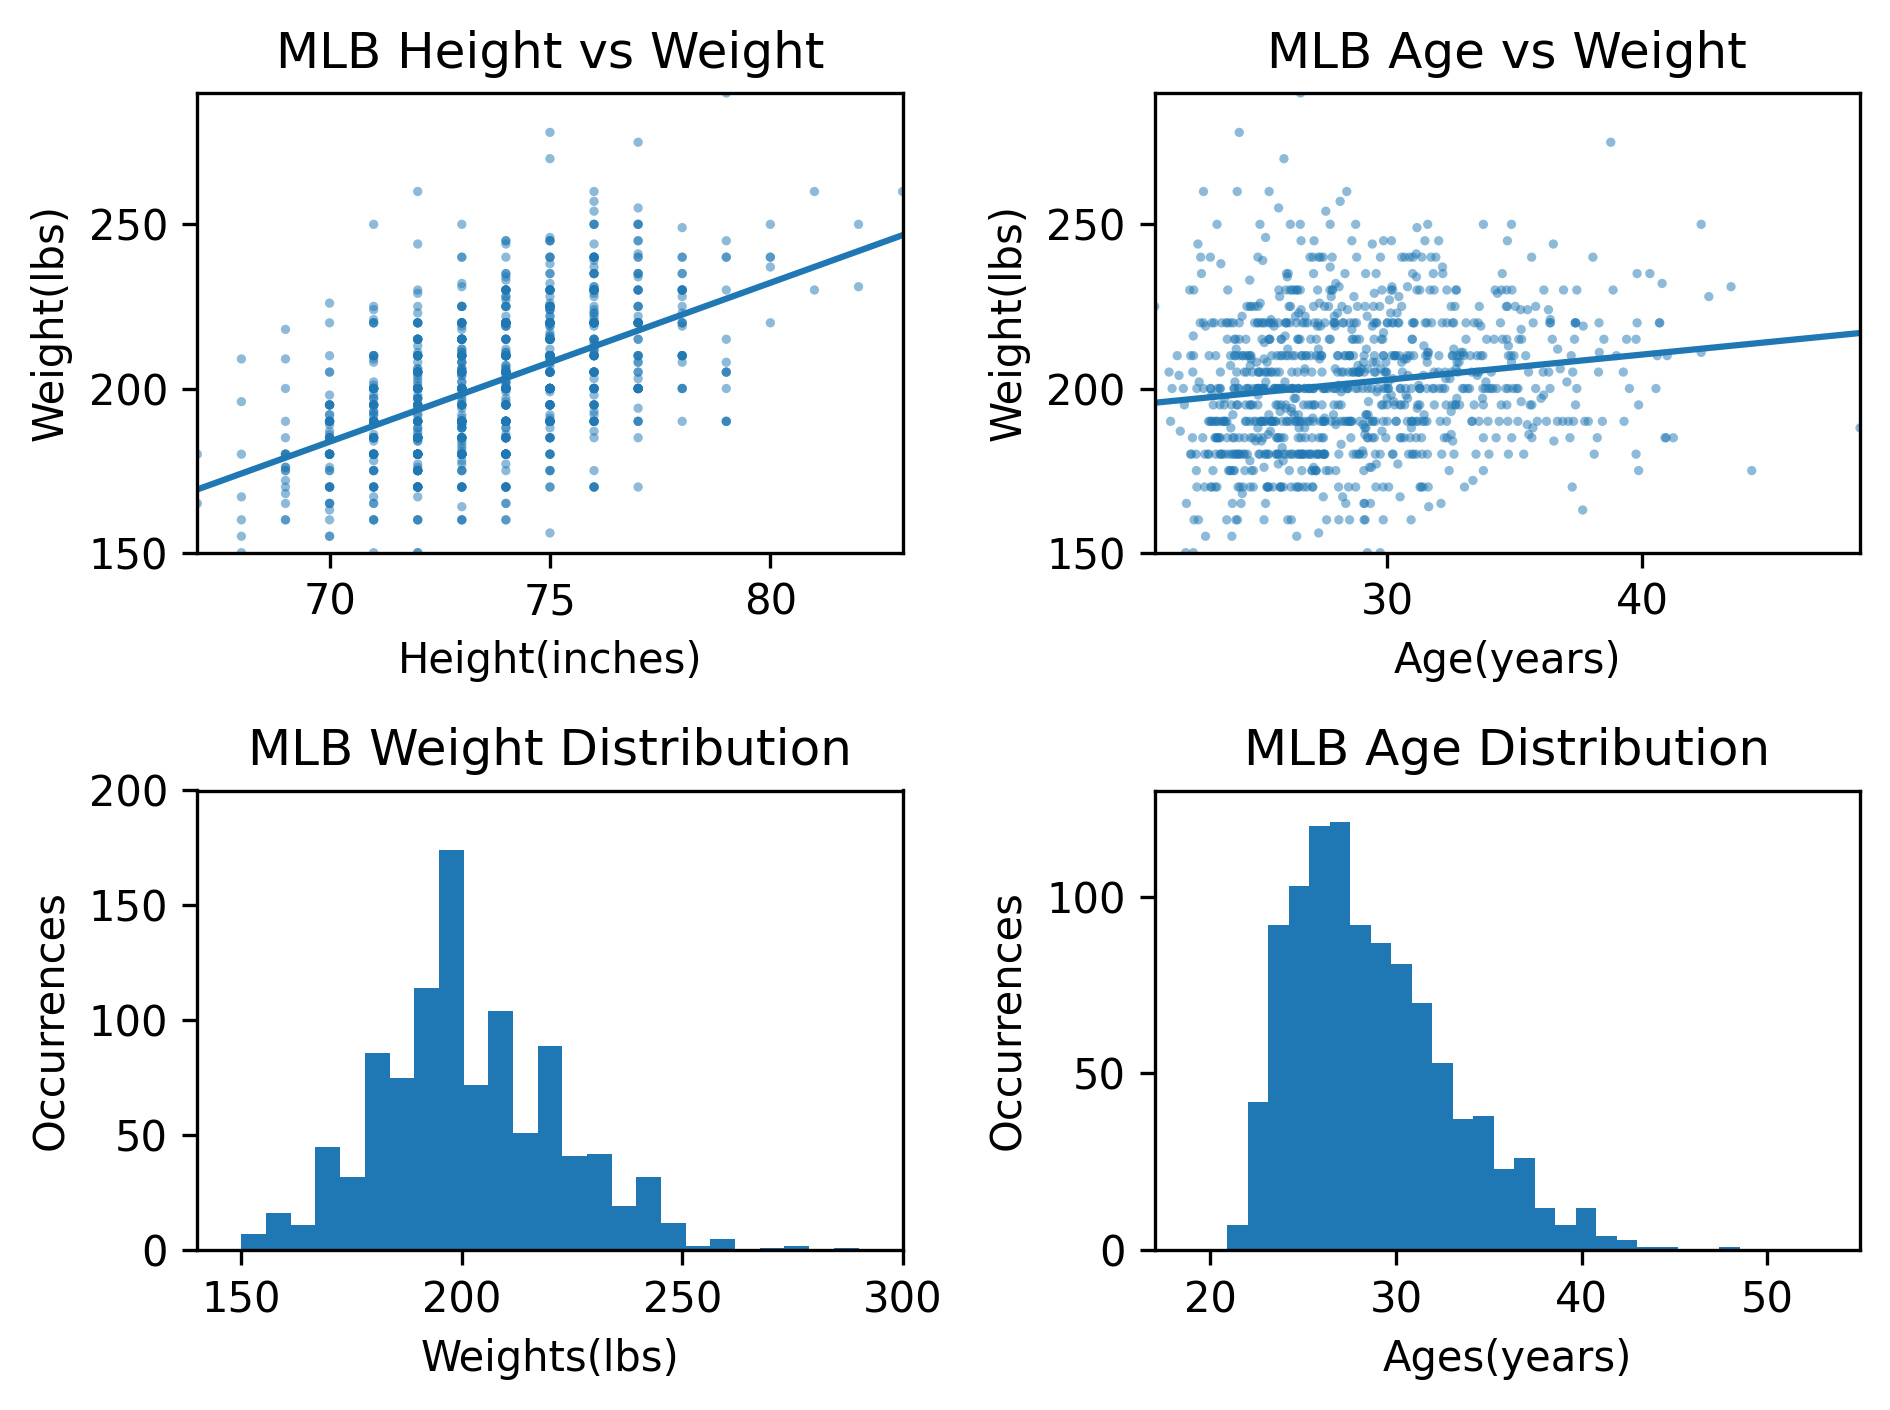

In [5]:
height, weight, age = np.load("MLB.npy").T

plt.subplot(221)     #plot scatter plot and regression of weight as a function of height
plt.scatter(height, weight, s=5, alpha=.5, edgecolor="none")
x = np.linspace(np.min(height), np.max(height), 50)
y = scipy.stats.linregress(height, weight)[0] * x + scipy.stats.linregress(height, weight)[1]
plt.plot(x,y)
plt.xlim(np.min(height), np.max(height))
plt.ylim(np.min(weight), np.max(weight))
plt.title("MLB Height vs Weight")
plt.xlabel("Height(inches)")
plt.ylabel("Weight(lbs)")

plt.subplot(222)  #plot scatter plot and regression of weight as a function of age
plt.scatter(age, weight, s=5, alpha=.5, edgecolor="none")
x = np.linspace(np.min(age), np.max(age), 50)
y = scipy.stats.linregress(age, weight)[0] * x + scipy.stats.linregress(age, weight)[1]
plt.plot(x,y)
plt.xlim(np.min(age), np.max(age))
plt.ylim(np.min(weight), np.max(weight))
plt.title("MLB Age vs Weight")
plt.xlabel("Age(years)")
plt.ylabel("Weight(lbs)")

plt.subplot(223)    #make histogram to represent weight distribution in the MLB
plt.hist(weight, bins=25)
plt.title("MLB Weight Distribution")
plt.xlabel("Weights(lbs)")
plt.ylabel("Occurrences")
plt.axis([140, 300, 0, 200])

plt.subplot(224)      #make histogram to represent age distribution in the MLB
plt.hist(age, bins=25)
plt.title("MLB Age Distribution")
plt.axis([17, 55, 0, 130])
plt.xlabel("Ages(years)")
plt.ylabel("Occurrences")

plt.tight_layout()
plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

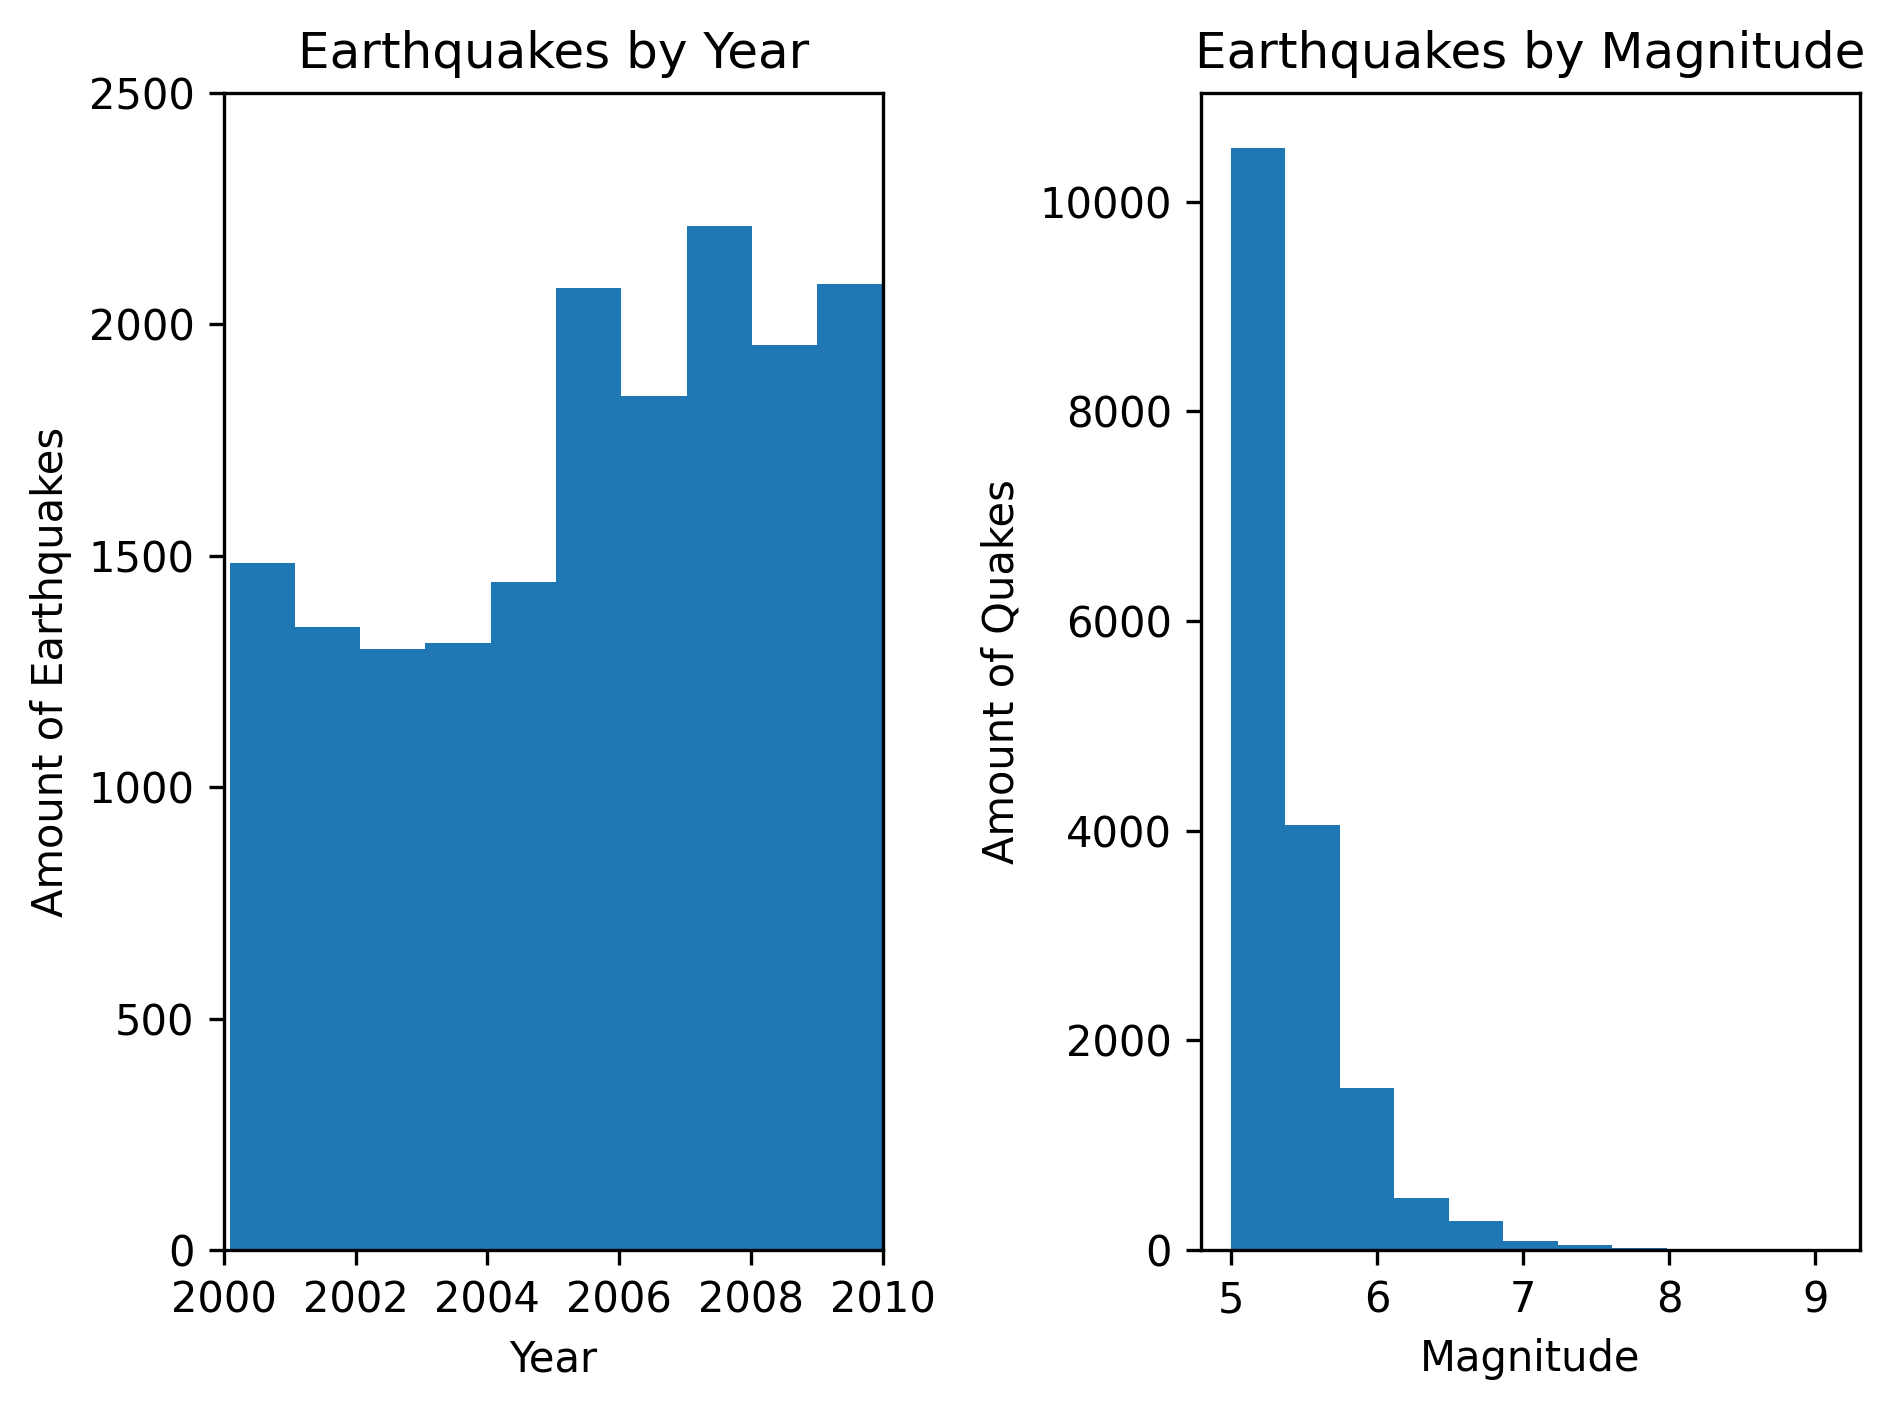

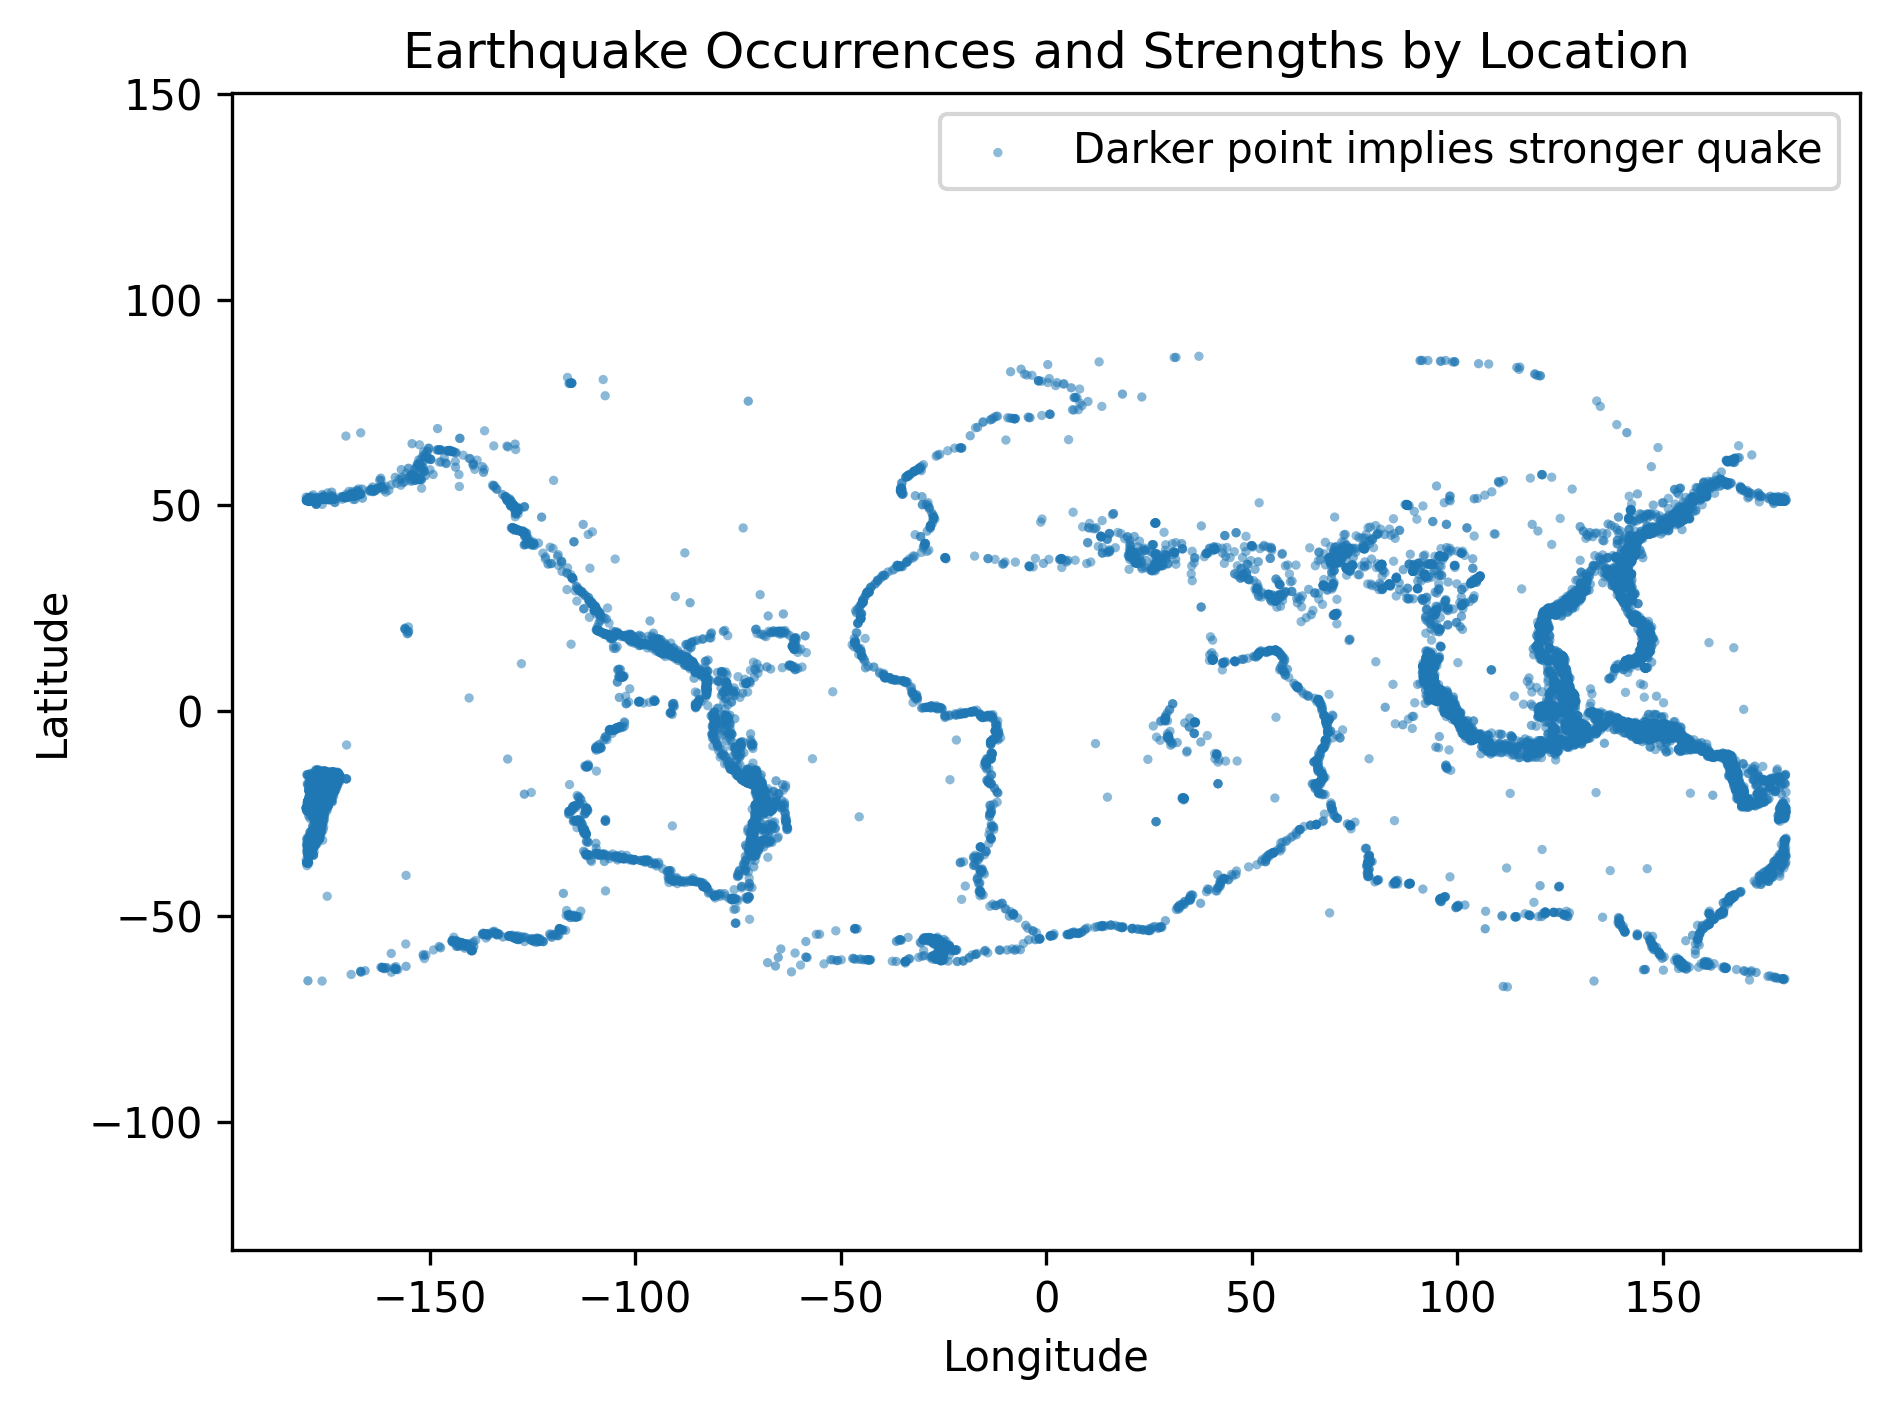

In [6]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

plt.subplot(121)       #create histogram of number of earthquakes by year
plt.hist(years, bins=10)
plt.title("Earthquakes by Year")
plt.axis([2000, 2010, 0, 2500])
plt.xlabel("Year")
plt.ylabel("Amount of Earthquakes")

plt.subplot(122)       #create histogram of number of earthquakes by magnitude
plt.hist(magnitudes, bins=11)
plt.title("Earthquakes by Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Amount of Quakes")

plt.tight_layout()
plt.show()

plt.scatter(longitude, latitude, s= 5, alpha=magnitudes/10, edgecolor="none", label="Darker point implies stronger quake")
plt.xlim(np.min(longitude), np.max(longitude))
plt.ylim(np.min(latitude), np.max(latitude))  
plt.title("Earthquake Occurrences and Strengths by Location")
plt.axis("equal")
plt.xlabel("Longitude")   #create scatter plot to show amount of earthquakes by location and where the strongest
plt.ylabel("Latitude")    #occur by making stronger quakes appear as darker points
plt.legend()

plt.tight_layout()
plt.show()




### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

<ipython-input-7-e35017584a46>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, rosen, cmap="viridis")


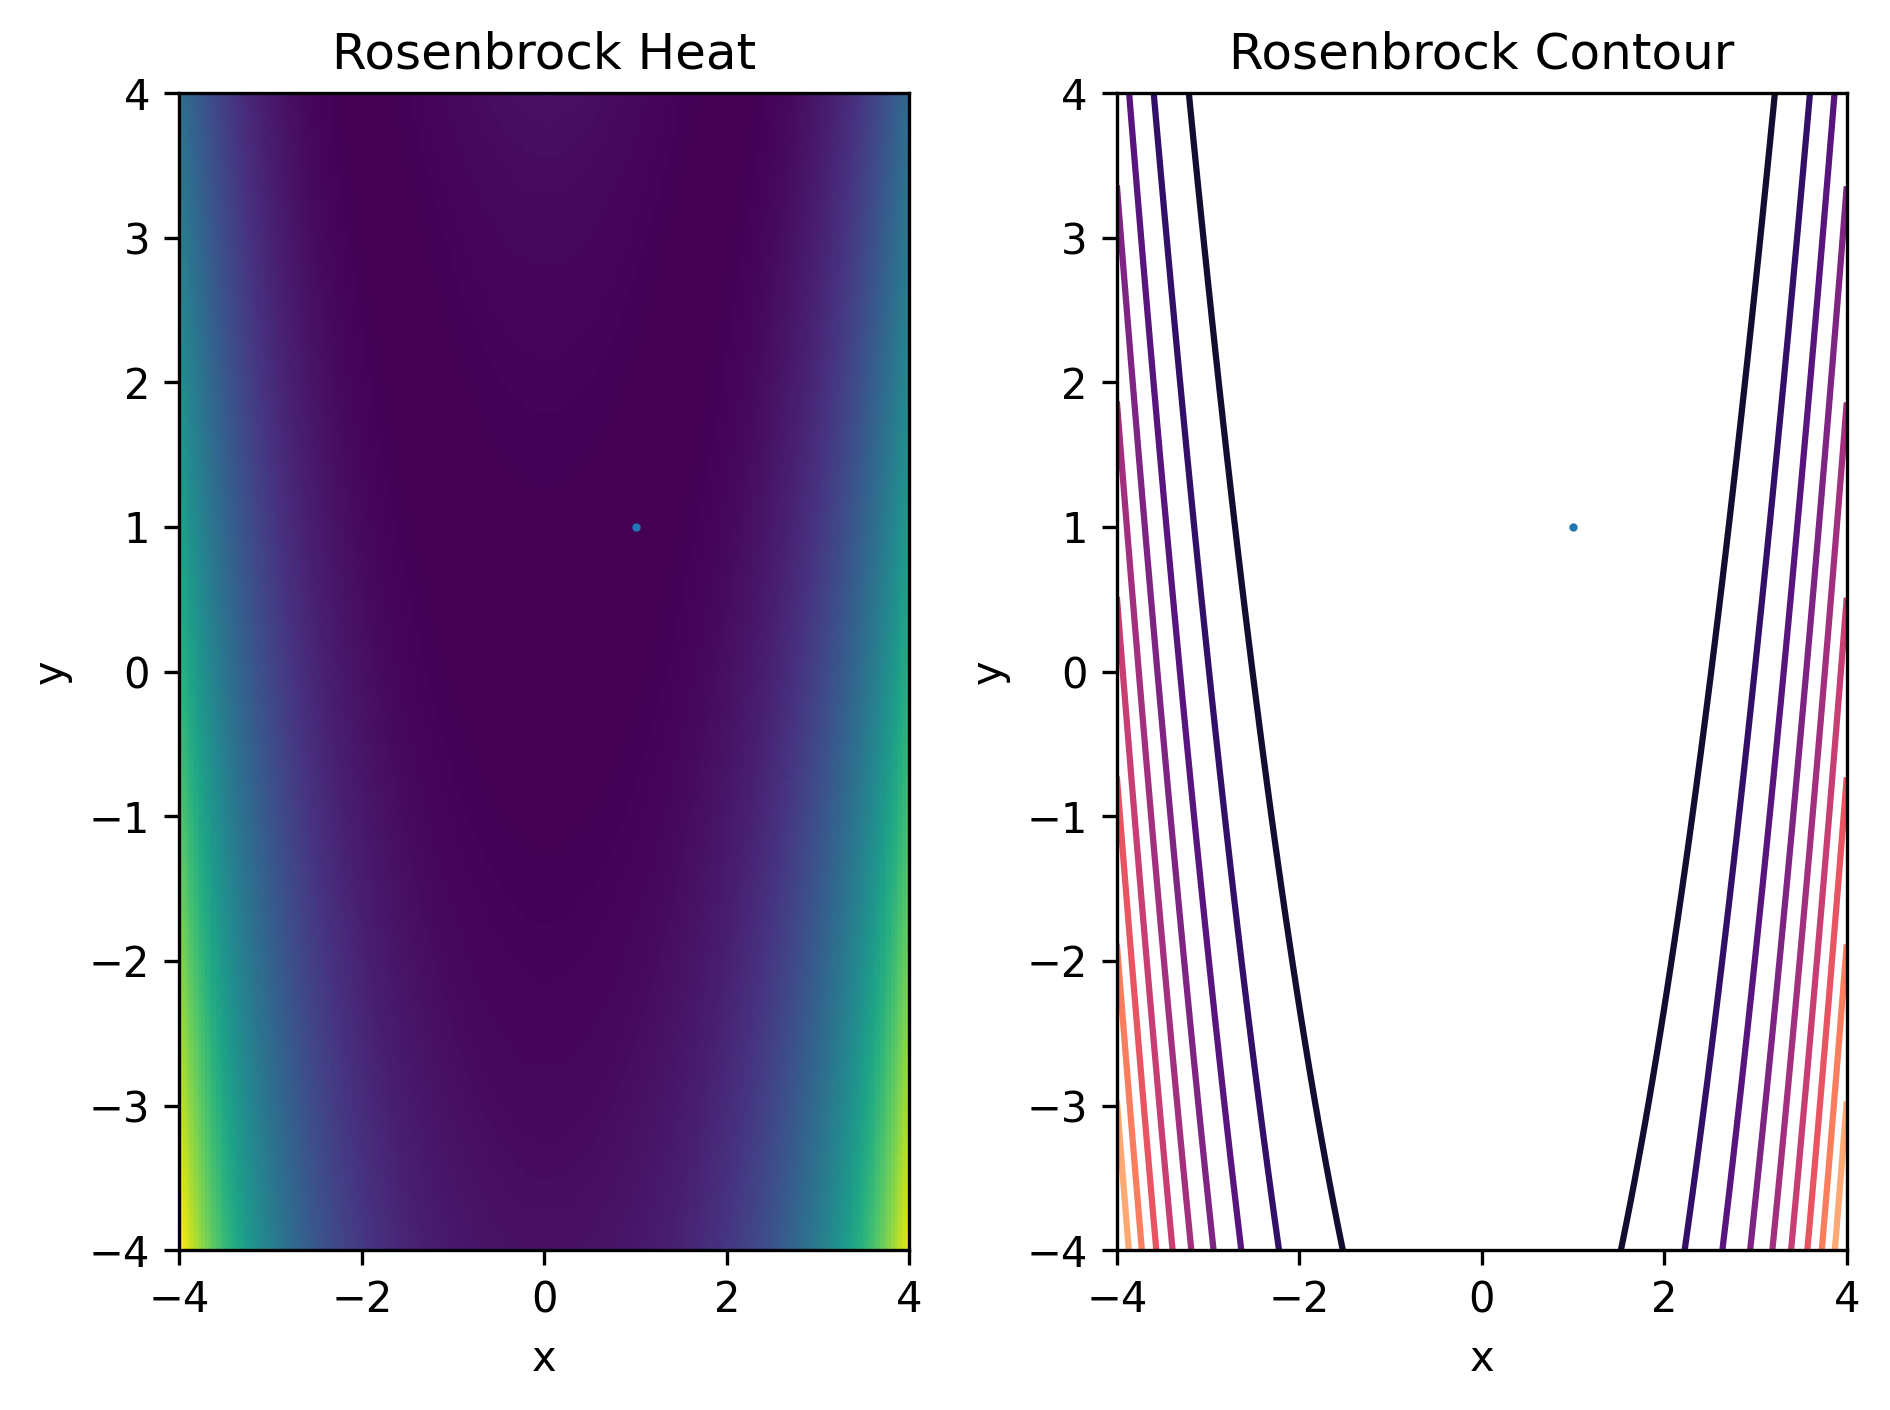

In [7]:
x = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, x)      #generate x and y coordinates to plug into our function


rosen = (1-X)**2 + 100*(Y-X**2)**2   #calculate the rosenbrock function

plt.subplot(121)    #visualize the rosenbrock function using a heat map
plt.pcolormesh(X, Y, rosen, cmap="viridis")
plt.plot(1,1, "o", markersize=1)   #plot the minimizer
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Heat")

plt.subplot(122)     #visualize the rosenbrock function using a contour map
plt.contour(X, Y, rosen, 10, cmap="magma")
plt.plot(1,1, "o", markersize=1)     #plot the minimizer
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Contour")

plt.tight_layout()
plt.show()


### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

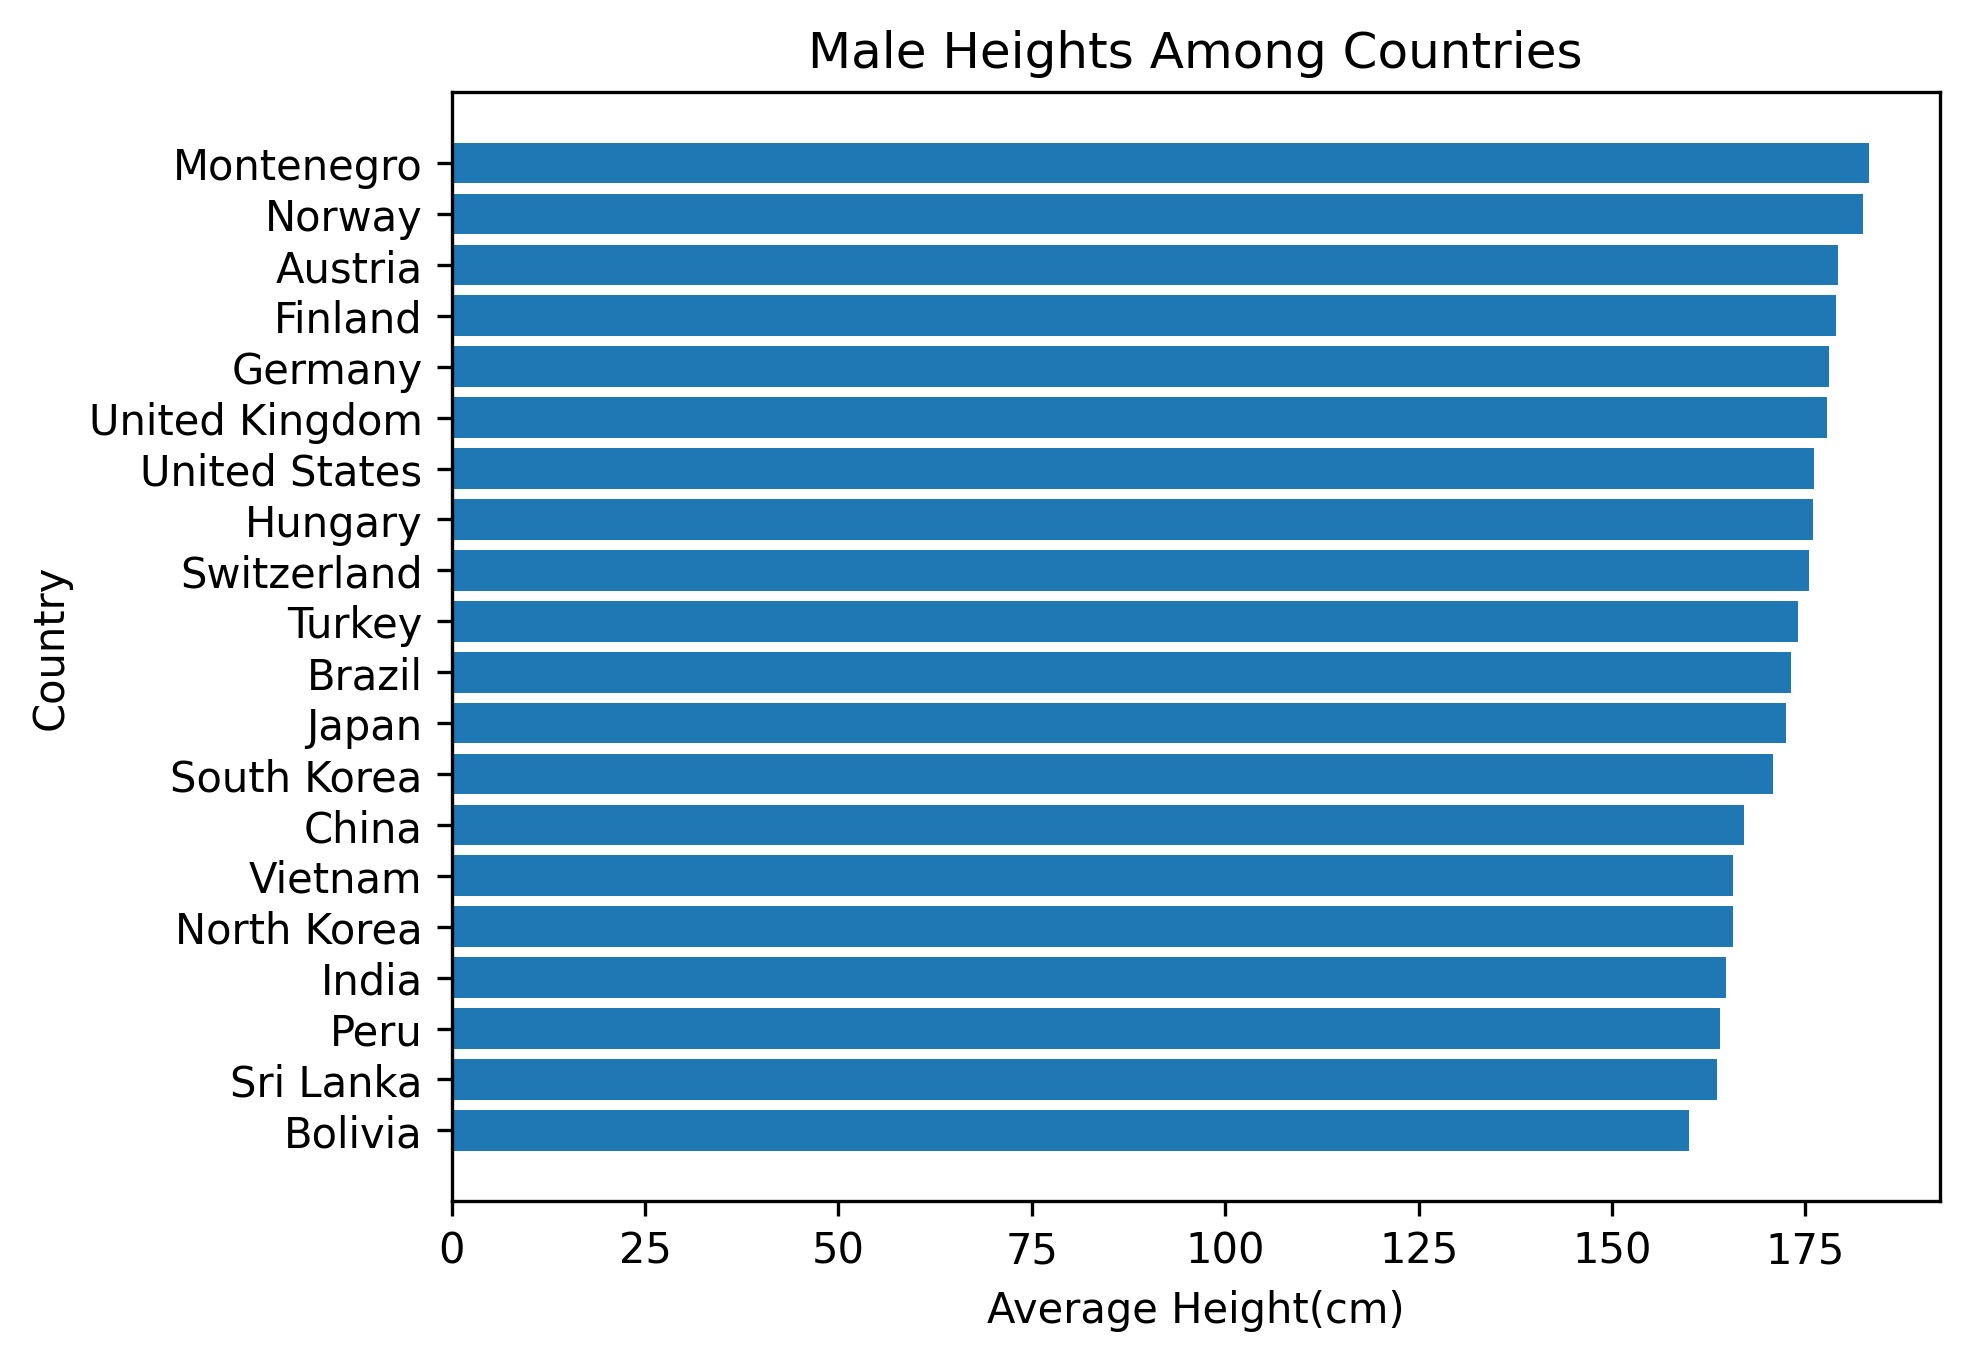

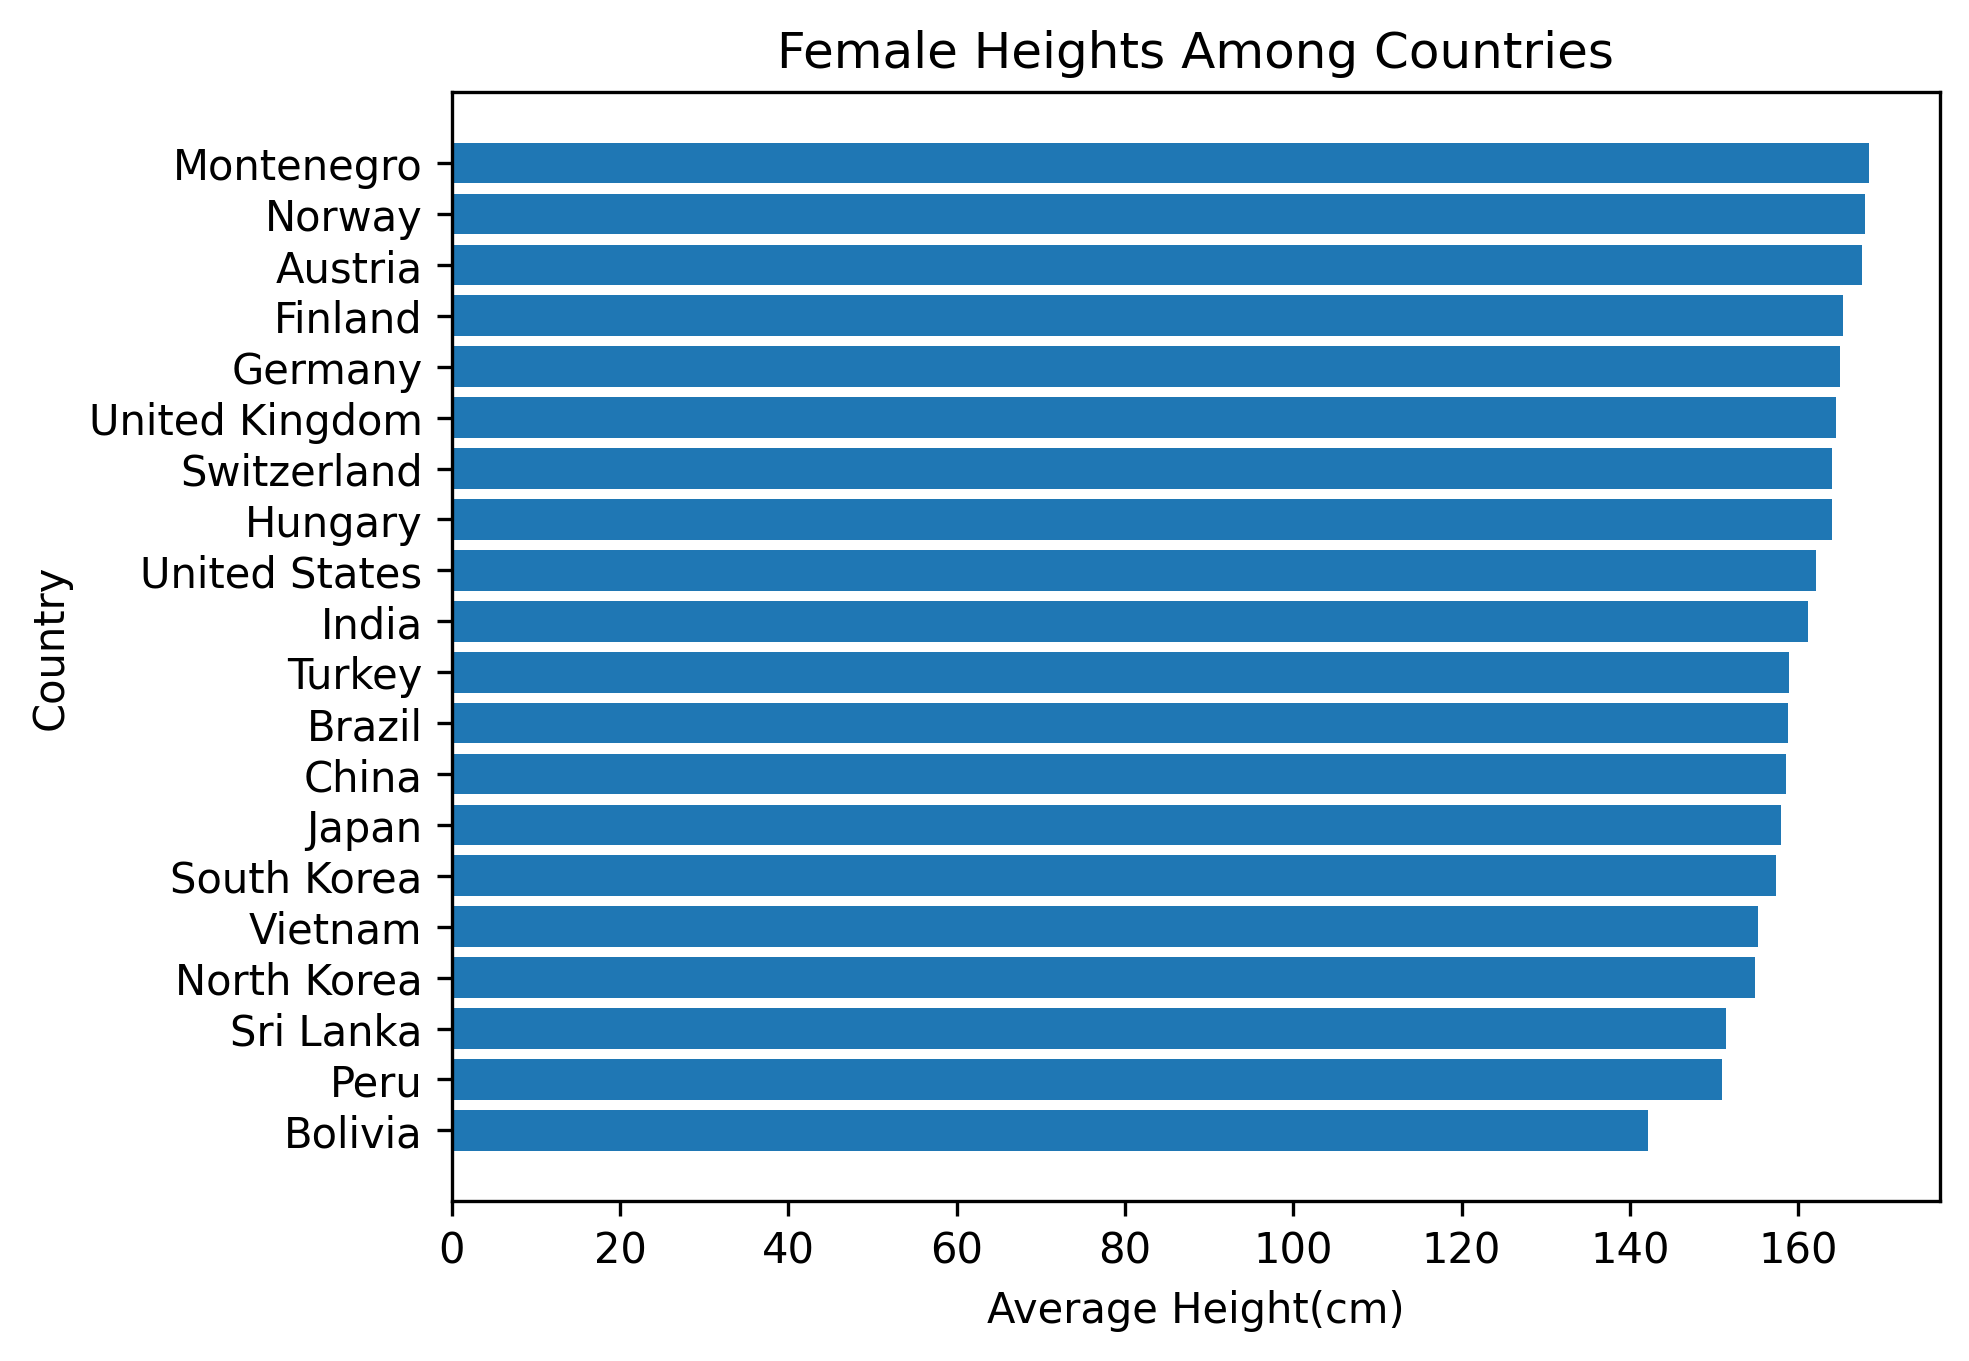

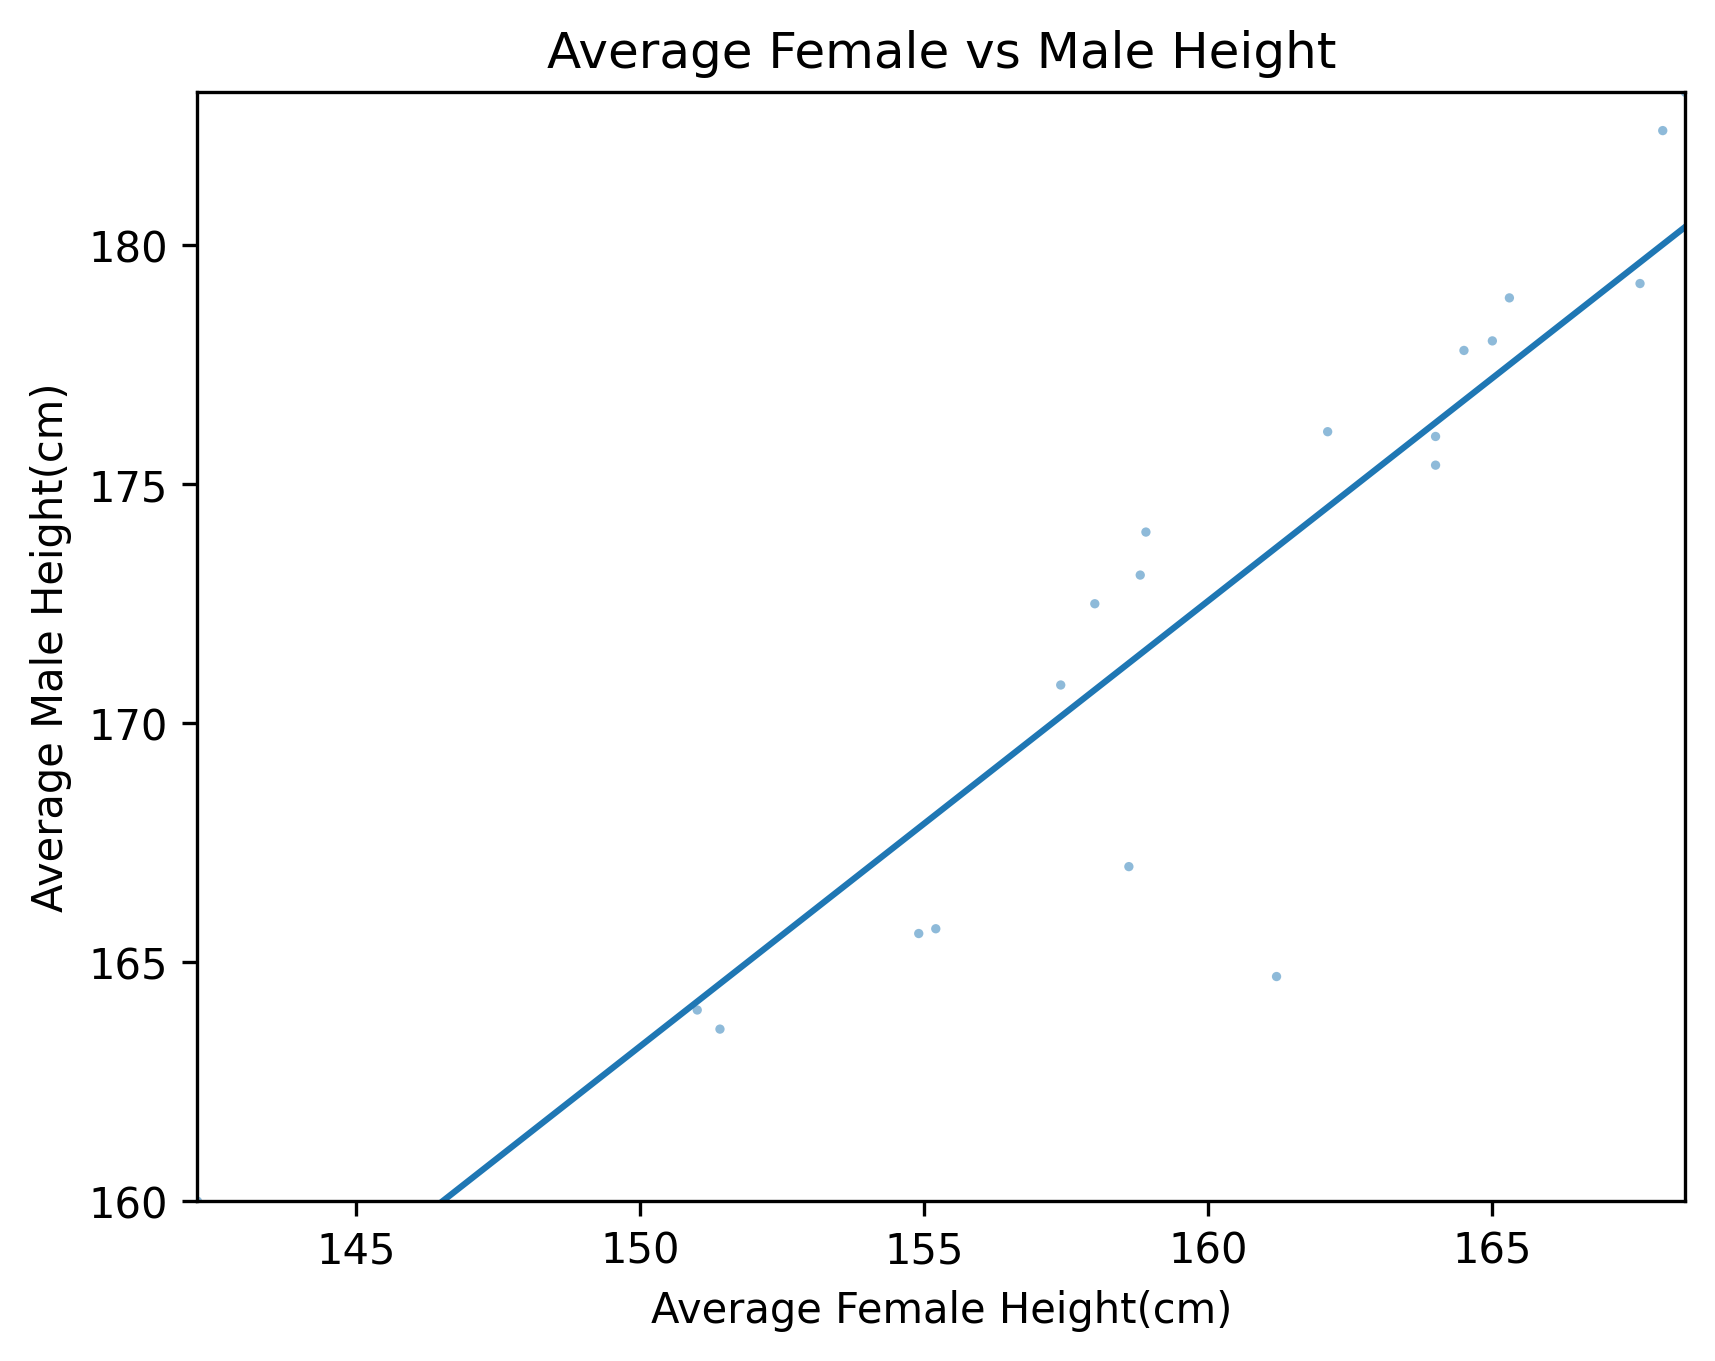

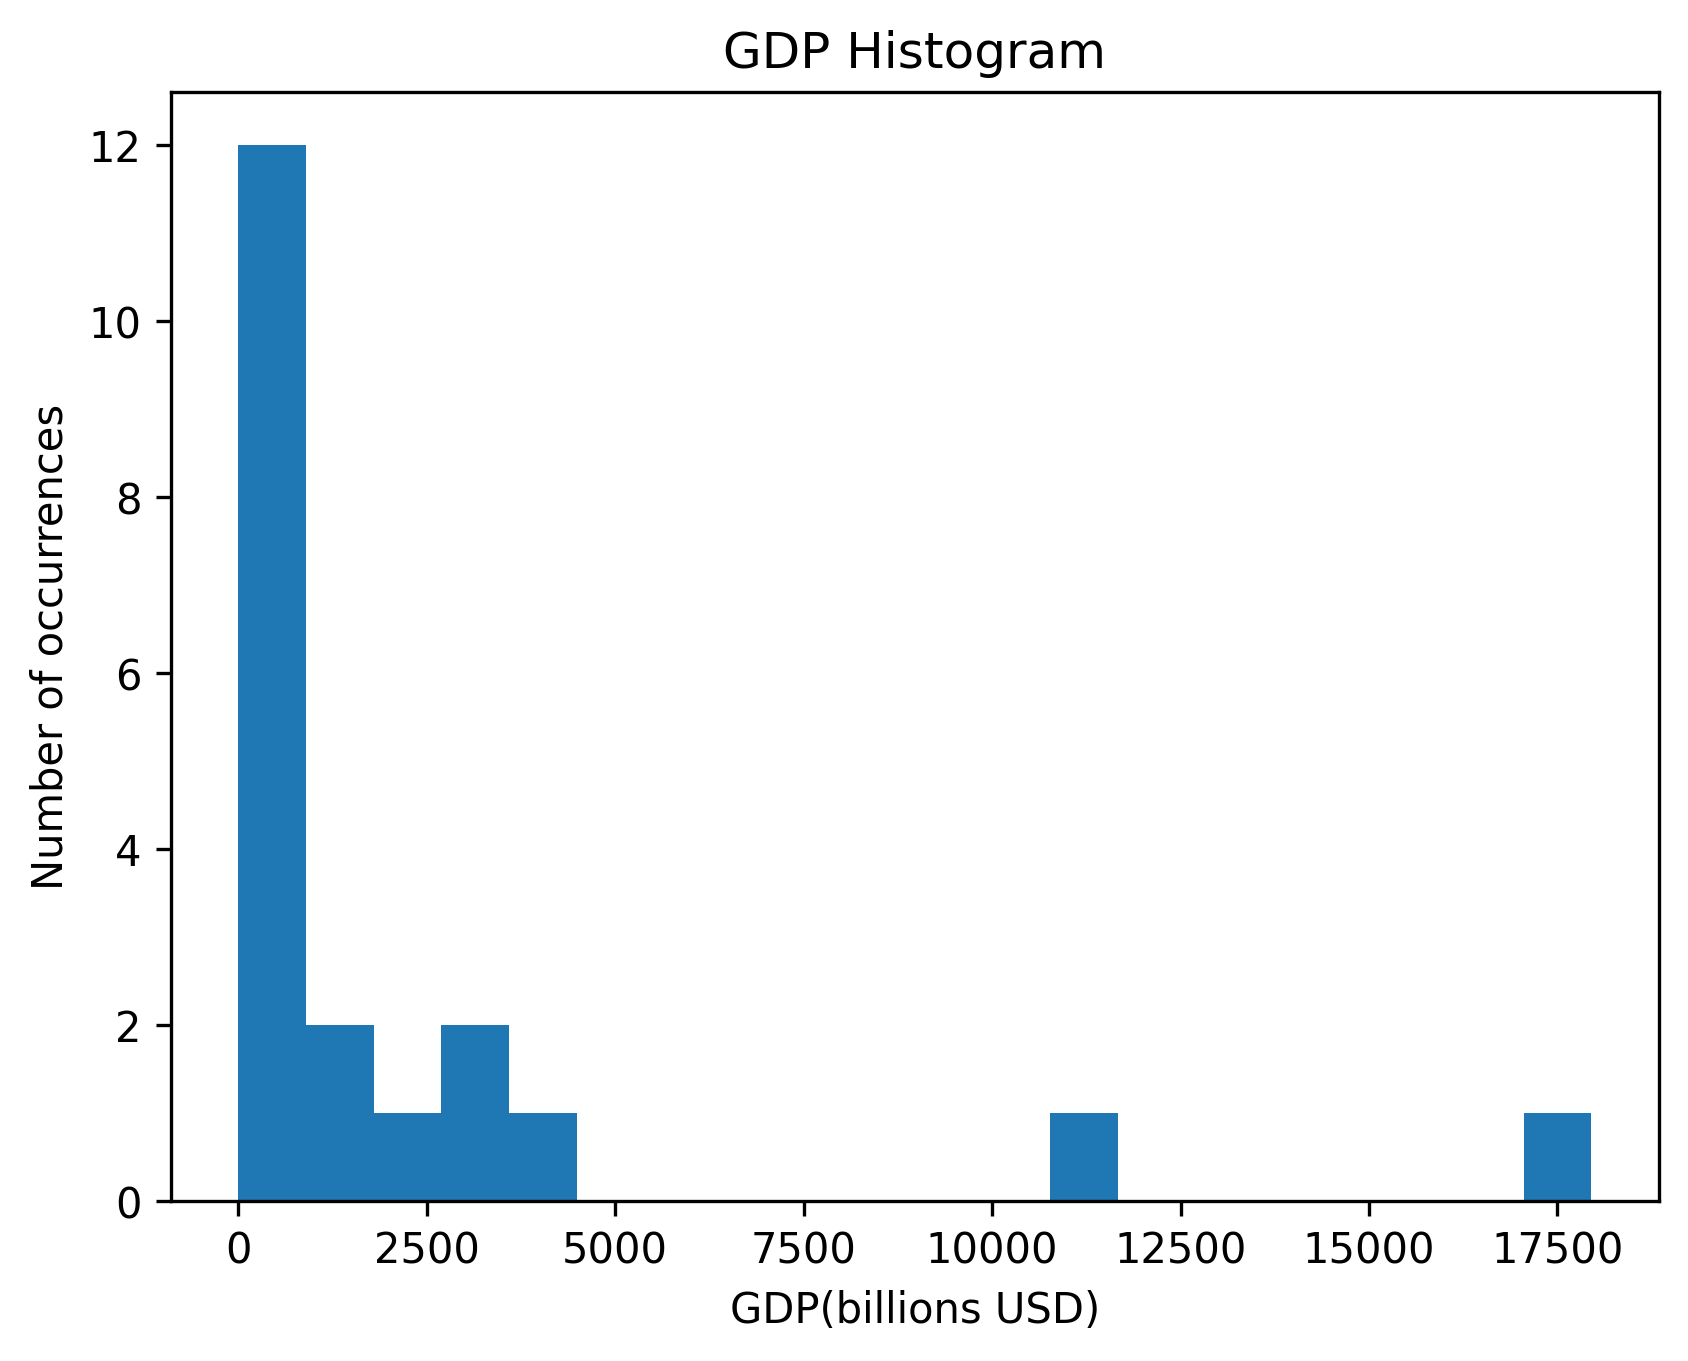

From the first plot(about male heights by country), we learn that the countries with
the tallest males tend to be in Europe.


From the second plot(about female heights by country), we learn that the countries with
the shortest females tend to be countries with largely non-caucasian populations.


From the third plot(about female and male height correlation), we see that there is a definite 
correlation between average female height and average male height in a country, suggesting that
countries with taller females tend to also have taller males as one might expect.


From the fourth plot(the gdp histogram), we see that most countries in our data set had a 2015 GDP 
below 2500 billion USD, and that only 2 countries had a 2015 GDP over 10000 billion USD.


In [8]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

m_sorted = np.argsort(male)   #sort the indices of male heights from smallest to largest
plt.title("Male Heights Among Countries")
plt.barh(countries[m_sorted], male[m_sorted], align='center')  #create horizontal bargraph representing average male heights of each country
plt.xlabel("Average Height(cm)")
plt.ylabel("Country")
plt.show()

f_sorted = np.argsort(female)    #sort the indices of female heights from smallest to largest
plt.title("Female Heights Among Countries")
plt.barh(countries[f_sorted], female[f_sorted], align='center')
plt.xlabel("Average Height(cm)")  #create horizontal bargraph representing average female heights of each country
plt.ylabel("Country")
plt.show()

plt.scatter(female, male, s=5, alpha=.5, edgecolor="none")   #create scatterplot and regression to analyze any possible 
x = np.linspace(np.min(female), np.max(female), 100)         #correlation between average male and female heights
y = scipy.stats.linregress(female, male)[0] * x + scipy.stats.linregress(female, male)[1]
plt.plot(x,y)
plt.xlim(np.min(female), np.max(female))
plt.ylim(np.min(male), np.max(male))
plt.title("Average Female vs Male Height")
plt.xlabel("Average Female Height(cm)")
plt.ylabel("Average Male Height(cm)")
plt.show()

plt.hist(gdp, bins=20)       #create a histogram showing number of countries with given GDPs
plt.title("GDP Histogram")
plt.xlabel("GDP(billions USD)")
plt.ylabel("Number of occurrences")
plt.show()


print('''From the first plot(about male heights by country), we learn that the countries with
the tallest males tend to be in Europe.''')
print('\n')    #analyze data from each graph
print('''From the second plot(about female heights by country), we learn that the countries with
the shortest females tend to be countries with largely non-caucasian populations.''')
print('\n')
print('''From the third plot(about female and male height correlation), we see that there is a definite 
correlation between average female height and average male height in a country, suggesting that
countries with taller females tend to also have taller males as one might expect.''')
print('\n')
print('''From the fourth plot(the gdp histogram), we see that most countries in our data set had a 2015 GDP 
below 2500 billion USD, and that only 2 countries had a 2015 GDP over 10000 billion USD.''')

